### Step 1. generate the imputed dataset
```bash
python dataset/generate_data_with_stimp.py --area PRE
```

### Step 2. train STIMP prediction function and baselines
#### 1) train STIMP prediction
```bash
for i in {0..9}  
do  
python prediction/train.py --index $i --area PRE
done
```
#### 2) train baselines
```bash
python prediction/train_without_spatial_imputation.py --method "CrossFormer" --area PRE
python prediction/train_without_spatial_imputation.py --method "iTransformer" --area PRE
python prediction/train_without_spatial_imputation.py --method "TSMixer" --area PRE
python prediction/train_without_imputation.py --method "MTGNN" --area PRE
python prediction/train_as_image_without_imputation.py --method "PredRNN" --area PRE
python prediction/train_xgboost_without_imputation.py --area PRE
```


In [1]:
import h5py
import scipy
import numpy as np
import torch
base_dir = "../log/prediction/PRE/"
label = np.load("../data/PRE/trues.npy")
label_masks = np.load("../data/PRE/true_masks.npy")

In [2]:
def load(path):
    path = path + "/with_imputation"
    preds = []
    for i in range(10):
        preds.append(np.load(path+"/prediction_{}.npy".format(i)))
    return np.stack(preds, axis=1)

In [3]:
prediction_xg = load(base_dir+"XGBoost")
prediction_xg_wo = np.load(base_dir+"XGBoost/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_our = load(base_dir+"STIMP")
prediction_our_wo = np.load(base_dir+"STIMP/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_mtgnn = load(base_dir+"MTGNN")
prediction_mtgnn_wo = np.load(base_dir+"MTGNN/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_tsmixer = load(base_dir+"TSMixer")
prediction_tsmixer_wo = np.load(base_dir+"TSMixer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_crossformer = load(base_dir+"CrossFormer")
prediction_crossformer_wo = np.load(base_dir+"CrossFormer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_iTransformer = load(base_dir+"iTransformer")
prediction_iTransformer_wo = np.load(base_dir+"iTransformer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_predrnn = load(base_dir+"PredRNN")
prediction_predrnn_wo = np.load(base_dir+"PredRNN/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_pde = np.load("../data/PRE/cmoms.npy")

**process the predictions**

In [4]:
label_masks = label_masks.squeeze()
label = label.squeeze()
label = torch.from_numpy(label)
label_masks = torch.from_numpy(label_masks)

prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_wo = torch.from_numpy(prediction_our_wo).squeeze()
prediction_xg = torch.from_numpy(prediction_xg).squeeze().median(1).values
prediction_xg_wo = torch.from_numpy(prediction_xg_wo).squeeze()
prediction_tsmixer = torch.from_numpy(prediction_tsmixer).squeeze().median(1).values
prediction_tsmixer_wo = torch.from_numpy(prediction_tsmixer_wo).squeeze()
prediction_mtgnn = torch.from_numpy(prediction_mtgnn).squeeze().median(1).values
prediction_mtgnn_wo = torch.from_numpy(prediction_mtgnn_wo).squeeze()
prediction_crossformer = torch.from_numpy(prediction_crossformer).squeeze().median(1).values
prediction_crossformer_wo = torch.from_numpy(prediction_crossformer_wo).squeeze()
prediction_iTransformer = torch.from_numpy(prediction_iTransformer).squeeze().median(1).values
prediction_iTransformer_wo = torch.from_numpy(prediction_iTransformer_wo).squeeze()
prediction_predrnn = torch.from_numpy(prediction_predrnn).squeeze().median(1).values
prediction_predrnn_wo = torch.from_numpy(prediction_predrnn_wo).squeeze()
prediction_pde = torch.from_numpy(prediction_pde)

In [5]:
mse_our= (((prediction_our.mean(1)- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_our))
mse_our_wo = (((prediction_our_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_our_wo))

mse_xg = (((prediction_xg - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_xg))
mse_xg_wo = (((prediction_xg_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_xg_wo))

mse_tsmixer = (((prediction_tsmixer- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_tsmixer))
mse_tsmixer_wo = (((prediction_tsmixer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_tsmixer_wo))

mse_crossformer = (((prediction_crossformer- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_crossformer))
mse_crossformer_wo = (((prediction_crossformer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)

mse_mtgnn = (((prediction_mtgnn - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_mtgnn))
mse_mtgnn_wo = (((prediction_mtgnn_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_mtgnn_wo))

mse_iTransformer = (((prediction_iTransformer - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_iTransformer))
mse_iTransformer_wo = (((prediction_iTransformer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_iTransformer_wo))

mse_predrnn = (((prediction_predrnn - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_predrnn))
mse_predrnn_wo = (((prediction_predrnn_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_predrnn_wo))

mse_pde = (((prediction_pde- label[:322,0])*label_masks[:322,0])**2).sum(0)/(label_masks[:322,0].sum(0)+1e-5)
print(np.nanmean(mse_pde))

0.06992425
0.09210903
0.16486254
0.18463
0.08029781
0.13500492
0.091983125
0.09408409
0.17269786
0.076714985
0.17230226
0.09105629
0.08998027
0.36186748716981854


In [6]:
mse_our[mse_our==0]=np.nan
mse_our_wo[mse_our_wo==0]=np.nan
mse_xg_wo[mse_xg_wo==0]=np.nan
mse_xg[mse_xg==0]=np.nan
mse_crossformer_wo[mse_crossformer_wo==0]=np.nan
mse_crossformer[mse_crossformer==0]=np.nan
mse_mtgnn_wo[mse_mtgnn_wo==0]=np.nan
mse_mtgnn[mse_mtgnn==0]=np.nan
mse_tsmixer_wo[mse_tsmixer_wo==0]=np.nan
mse_tsmixer[mse_tsmixer==0]=np.nan
mse_iTransformer_wo[mse_iTransformer_wo==0]=np.nan
mse_iTransformer[mse_iTransformer==0]=np.nan
mse_predrnn_wo[mse_predrnn_wo==0]=np.nan
mse_predrnn[mse_predrnn==0]=np.nan

**Supplementary Fig 4a**

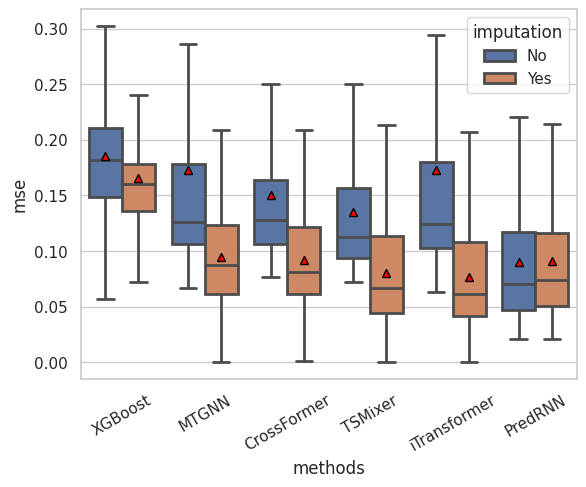

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
num_nodes = prediction_our.shape[-1]
category = []
category.extend(['XGBoost' for i in range(num_nodes)])
category.extend(['XGBoost' for i in range(num_nodes)])
category.extend(['MTGNN' for i in range(num_nodes)])
category.extend(['MTGNN' for i in range(num_nodes)])
category.extend(['CrossFormer' for i in range(num_nodes)])
category.extend(['CrossFormer' for i in range(num_nodes)])
category.extend(['TSMixer' for i in range(num_nodes)])
category.extend(['TSMixer' for i in range(num_nodes)])
category.extend(['iTransformer' for i in range(num_nodes)])
category.extend(['iTransformer' for i in range(num_nodes)])
category.extend(['PredRNN' for i in range(num_nodes)])
category.extend(['PredRNN' for i in range(num_nodes)])
imputation = []
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])

data = {'mse': np.concatenate([mse_xg_wo.numpy(), mse_xg.numpy(), mse_mtgnn_wo.numpy(), mse_mtgnn.numpy(), mse_crossformer_wo.numpy(), mse_crossformer.numpy(), mse_tsmixer_wo.numpy(), mse_tsmixer.numpy(), mse_iTransformer_wo.numpy(), mse_iTransformer.numpy(), mse_predrnn_wo.numpy(), mse_predrnn.numpy()],0),
        'methods':category,
        'imputation':imputation}
data = pd.DataFrame.from_dict(data)
sns.set(style="whitegrid")
plt.xticks(rotation=30)
g = sns.boxplot(x='methods', y='mse', hue='imputation', linewidth=2,showfliers=False,showmeans=True,data=data,meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})

**Supplementary Fig 2a**

['#FC8002', '#96ABDC', '#9EC5CC', '#BFDAB6', '#F1CFB0', '#4E5E7B', '#80AE6B', '#F8766D']


/tmp/ipykernel_106384/3474747820.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(x='methods', y='mse', linewidth=2,showfliers=False,showmeans=True,data=data,palette=color, meanprops={


([], [])

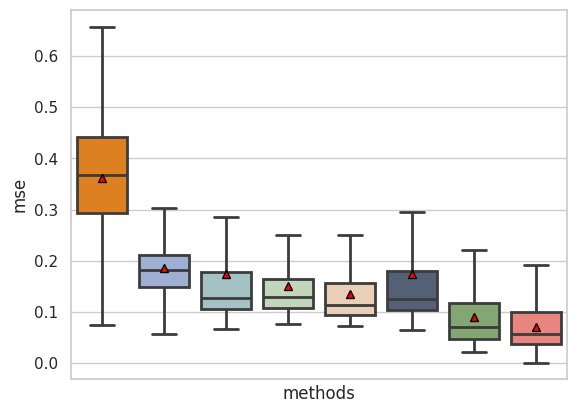

In [8]:
import pandas as pd
import numpy as np
category = []
category.extend(['cmoms' for i in range(num_nodes)])
category.extend(['XGBoost' for i in range(num_nodes)])
category.extend(['MTGNN' for i in range(num_nodes)])
category.extend(['CrossFormer' for i in range(num_nodes)])
category.extend(['TSMixer' for i in range(num_nodes)])
category.extend(['iTransformer' for i in range(num_nodes)])
category.extend(['PredRNN' for i in range(num_nodes)])
category.extend(['Our' for i in range(num_nodes)])
data = {'mse': np.concatenate([mse_pde.numpy(), mse_xg_wo.numpy(), mse_mtgnn_wo.numpy(), mse_crossformer_wo.numpy(), mse_tsmixer_wo.numpy(), mse_iTransformer_wo.numpy(), mse_predrnn_wo.numpy(),  mse_our.numpy()],0),
        'methods':category}
data = pd.DataFrame.from_dict(data)
sns.set(style="whitegrid")
plt.xticks(rotation=30)
color = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC", "#FC8002"][::-1]
print(color)
g = sns.boxplot(x='methods', y='mse', linewidth=2,showfliers=False,showmeans=True,data=data,palette=color, meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})
plt.xticks([])

In [9]:
mae_our= ((np.abs(prediction_our.mean(1)- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_our))
mae_our_wo = ((np.abs(prediction_our_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_our_wo))

mae_xg = ((np.abs(prediction_xg - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_xg))
mae_xg_wo = ((np.abs(prediction_xg_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_xg_wo))

mae_tsmixer = ((np.abs(prediction_tsmixer- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_tsmixer))
mae_tsmixer_wo = ((np.abs(prediction_tsmixer_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_tsmixer_wo))

mae_crossformer = ((np.abs(prediction_crossformer- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_crossformer))
mae_crossformer_wo = ((np.abs(prediction_crossformer_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_crossformer_wo))

mae_mtgnn = ((np.abs(prediction_mtgnn - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_mtgnn))
mae_mtgnn_wo = ((np.abs(prediction_mtgnn_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_mtgnn_wo))

mae_iTransformer = ((np.abs(prediction_iTransformer - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_iTransformer))
mae_iTransformer_wo = ((np.abs(prediction_iTransformer_wo- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_iTransformer_wo))

mae_predrnn = ((np.abs(prediction_predrnn - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_predrnn))
mae_predrnn_wo = ((np.abs(prediction_predrnn_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_predrnn_wo))

mae_pde = ((np.abs(prediction_pde - label[:322,0])*label_masks[:322,0])).sum(0)/(label_masks[:322,0].sum(0)+1e-5)

0.1927668
0.22710621
0.33940437
0.35655594
0.2180024
0.29954606
0.2402925
0.31450367
0.24517104
0.34601954
0.20689625
0.34509417
0.22762473
0.22148255


In [10]:
mae_our[mae_our==0]=np.nan
mae_our_wo[mae_our_wo==0]=np.nan
mae_xg_wo[mae_xg_wo==0]=np.nan
mae_xg[mae_xg==0]=np.nan
mae_crossformer_wo[mae_crossformer_wo==0]=np.nan
mae_crossformer[mae_crossformer==0]=np.nan
mae_mtgnn_wo[mae_mtgnn_wo==0]=np.nan
mae_mtgnn[mae_mtgnn==0]=np.nan
mae_tsmixer_wo[mae_tsmixer_wo==0]=np.nan
mae_tsmixer[mae_tsmixer==0]=np.nan
mae_iTransformer_wo[mae_iTransformer_wo==0]=np.nan
mae_iTransformer[mae_iTransformer==0]=np.nan
mae_predrnn_wo[mae_predrnn_wo==0]=np.nan
mae_predrnn[mae_predrnn==0]=np.nan

**Supplementary Fig 4a**

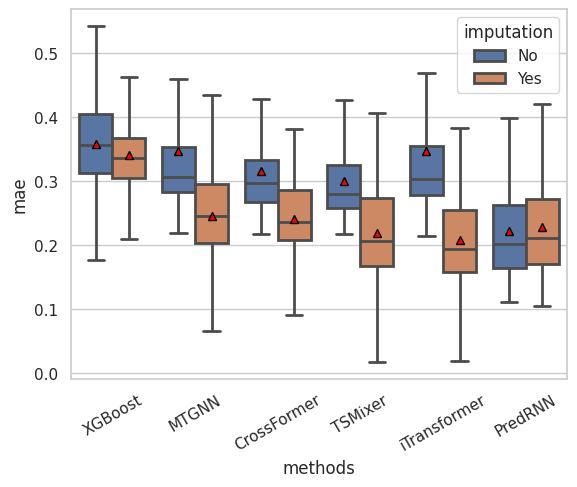

In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
category = []
category.extend(['XGBoost' for i in range(num_nodes)])
category.extend(['XGBoost' for i in range(num_nodes)])
category.extend(['MTGNN' for i in range(num_nodes)])
category.extend(['MTGNN' for i in range(num_nodes)])
category.extend(['CrossFormer' for i in range(num_nodes)])
category.extend(['CrossFormer' for i in range(num_nodes)])
category.extend(['TSMixer' for i in range(num_nodes)])
category.extend(['TSMixer' for i in range(num_nodes)])
category.extend(['iTransformer' for i in range(num_nodes)])
category.extend(['iTransformer' for i in range(num_nodes)])
category.extend(['PredRNN' for i in range(num_nodes)])
category.extend(['PredRNN' for i in range(num_nodes)])

imputation = []
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])

data = {'mae': np.concatenate([mae_xg_wo.numpy(), mae_xg.numpy(), mae_mtgnn_wo.numpy(), mae_mtgnn.numpy(), mae_crossformer_wo.numpy(), mae_crossformer.numpy(), mae_tsmixer_wo.numpy(), mae_tsmixer.numpy(), mae_iTransformer_wo.numpy(), mae_iTransformer.numpy(), mae_predrnn_wo.numpy(), mae_predrnn.numpy()],0),
        'methods':category,
        'imputation':imputation}
data = pd.DataFrame.from_dict(data)



plt.xticks(rotation=30)
g = sns.boxplot(x='methods', y='mae', hue='imputation', linewidth=2,showfliers=False,showmeans=True,data=data,meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})

**Fig 2b Pearl River Estuary**

([], [])

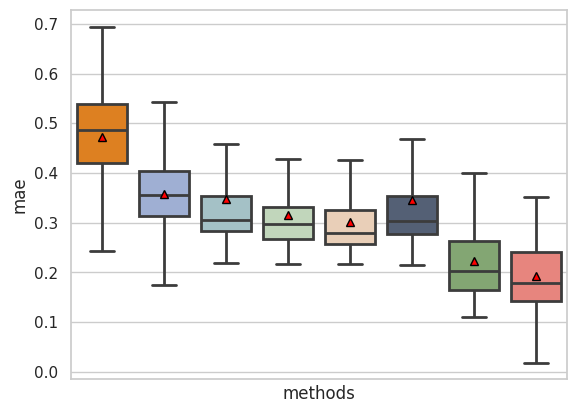

In [24]:
import pandas as pd
import numpy as np
category = []
category.extend(['CMOMS' for i in range(num_nodes)])
category.extend(['XGBoost' for i in range(num_nodes)])
category.extend(['MTGNN' for i in range(num_nodes)])
category.extend(['CrossFormer' for i in range(num_nodes)])
category.extend(['TSMixer' for i in range(num_nodes)])
category.extend(['iTransformer' for i in range(num_nodes)])
category.extend(['PredRNN' for i in range(num_nodes)])
category.extend(['Our' for i in range(num_nodes)])
data = {'mae': np.concatenate([ mae_pde.numpy(), mae_xg_wo.numpy(), mae_mtgnn_wo.numpy(), mae_crossformer_wo.numpy(), mae_tsmixer_wo.numpy(), mae_iTransformer_wo.numpy(), mae_predrnn_wo.numpy(),  mae_our.numpy()],0),
        'methods':category}
data = pd.DataFrame.from_dict(data)
sns.set(style="whitegrid")
plt.xticks(rotation=30)
# color= sns.color_palette()[:7][::-1]
color = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC", "#FC8002"][::-1]

g = sns.boxplot(data=data, x='methods', y='mae', hue="methods", linewidth=2, showfliers=False,showmeans=True,palette=color, meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})
# g.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
plt.xticks([])

**Fig 3d PredRNN**

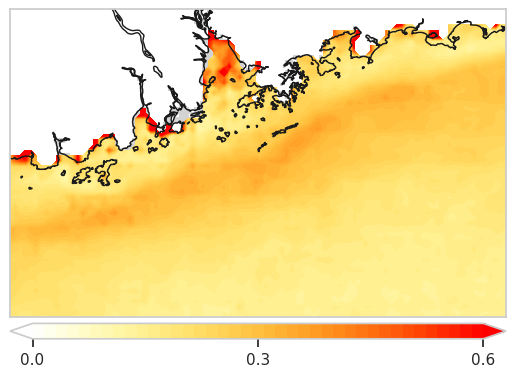

In [11]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np
from cmap import Colormap

cm = Colormap('vispy:fire').to_mpl()  # case insensitive
is_sea = np.load("../data/PRE/is_sea.npy")
mae_xg_sp = deepcopy(mae_predrnn_wo.numpy())
tmp = np.zeros((60,96))
tmp[~is_sea.astype(bool)]= np.nan
tmp[is_sea.astype(bool)]= mae_xg_sp

lon = np.load("../data/PRE/lon.npy")
lati = np.load("../data/PRE/lati.npy")


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, tmp, levels=np.linspace(0, 0.6, 40),cmap=cm,extend='both')

map.colorbar(boundaries=np.linspace(0, 0.6, 100), ticks=np.linspace(0, 0.6, 3),location='bottom')

**Fig 3d STIMP w/o Imputation**

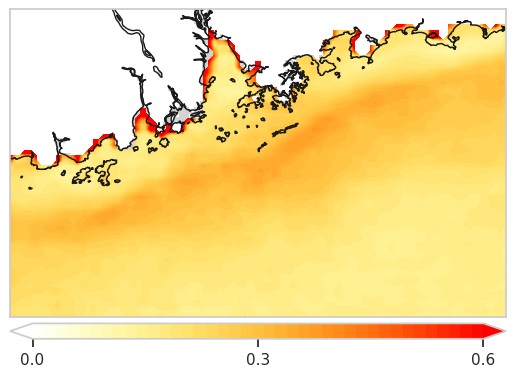

In [12]:
mae_our_sp = deepcopy(mae_our_wo.numpy())
tmp = np.zeros((60,96))
tmp[~is_sea.astype(bool)]= np.nan
tmp[is_sea.astype(bool)]= mae_our_sp

map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, tmp, levels=np.linspace(0, 0.6, 40),cmap=cm,extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(0, 0.6, 100), ticks=np.linspace(0, 0.6, 3),location='bottom')

**Fig 3e STIMP**

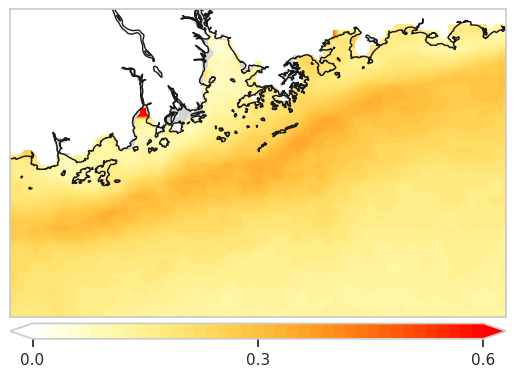

In [13]:
mae_our_sp = deepcopy(mae_our.numpy())
tmp = np.zeros((60,96))
tmp[~is_sea.astype(bool)]= np.nan
tmp[is_sea.astype(bool)]= mae_our_sp

map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, tmp, levels=np.linspace(0, 0.6, 40),cmap=cm,extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(0, 0.6, 100), ticks=np.linspace(0, 0.6, 3),location='bottom')

**Fig 3d improvement**

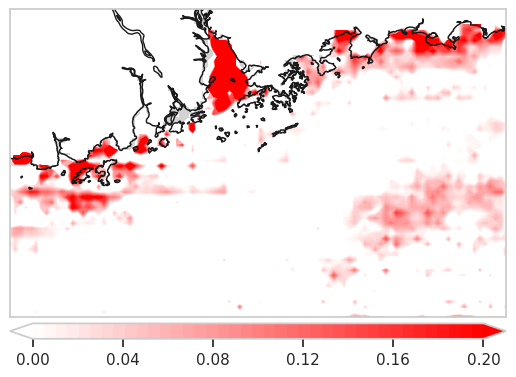

In [14]:
cm = Colormap('chrisluts:I_Red').to_mpl()
improvement =  (mae_predrnn_wo.numpy() - mae_our_wo.numpy())/mae_predrnn_wo.numpy()
tmp = np.zeros((60,96))
tmp[~is_sea.astype(bool)]= np.nan
tmp[is_sea.astype(bool)]= improvement

map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, tmp, levels=np.linspace(0, 0.2, 40),cmap=cm,extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(0, 0.2, 100), ticks=np.linspace(0, 0.2, 6),location="bottom")

**Fig 3e improvement**

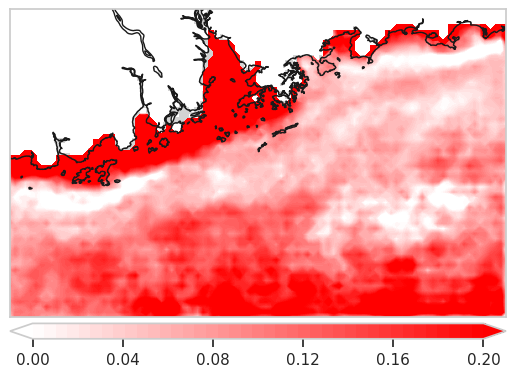

In [15]:
improvement =  (mae_our_wo.numpy() - mae_our.numpy())/mae_our_wo.numpy()
tmp = np.zeros((60,96))
tmp[~is_sea.astype(bool)]= np.nan
tmp[is_sea.astype(bool)]= improvement

map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, tmp, levels=np.linspace(0, 0.2, 40),cmap=cm,extend='both')

map.colorbar(boundaries=np.linspace(0, 0.2, 100), ticks=np.linspace(0, 0.2, 6),location="bottom")

**Fig 3f**

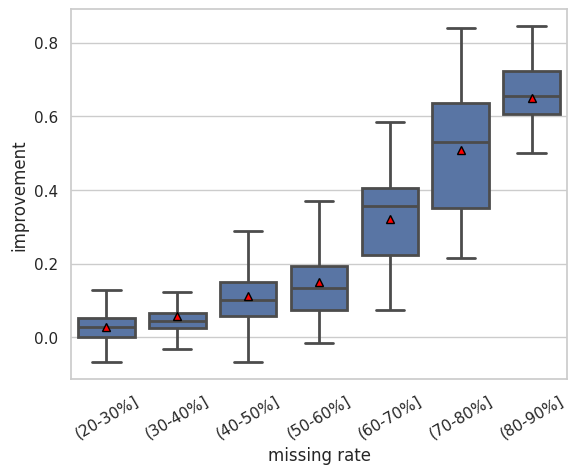

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

is_sea = np.load("../data/PRE/is_sea.npy")
chla = np.load("../data/PRE/chla.npy")
chla = chla[648:]
missing_rate = np.sum(np.isnan(chla), 0)/chla.shape[0]
missing_rate = missing_rate[is_sea.astype(bool)]

improvement =  (mae_our_wo.numpy() - mae_our.numpy())/mae_our_wo.numpy()
mse = [improvement[np.bitwise_and(missing_rate>i*0.1, missing_rate<=(i+1)*0.1)] for i in range(9)]

category = []
category.extend(['(0-10%]' for i in range(len(mse[0]))])
category.extend(['(10-20%]' for i in range(len(mse[1]))])
category.extend(['(20-30%]' for i in range(len(mse[2]))])
category.extend(['(30-40%]' for i in range(len(mse[3]))])
category.extend(['(40-50%]' for i in range(len(mse[4]))])
category.extend(['(50-60%]' for i in range(len(mse[5]))])
category.extend(['(60-70%]' for i in range(len(mse[6]))])
category.extend(['(70-80%]' for i in range(len(mse[7]))])
category.extend(['(80-90%]' for i in range(len(mse[8]))])

data = {'improvement': np.concatenate(mse,0), 
        'missing rate':category}
data = pd.DataFrame.from_dict(data)
sns.set(style="whitegrid")
plt.xticks(rotation=30)
g = sns.boxplot(x='missing rate', y='improvement',  linewidth=2,showfliers=False,showmeans=True,data=data,meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})

**Fig 3h observation mean**

/tmp/ipykernel_106384/3991319613.py:4: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(np.load("../data/PRE/chla.npy").squeeze(),0)


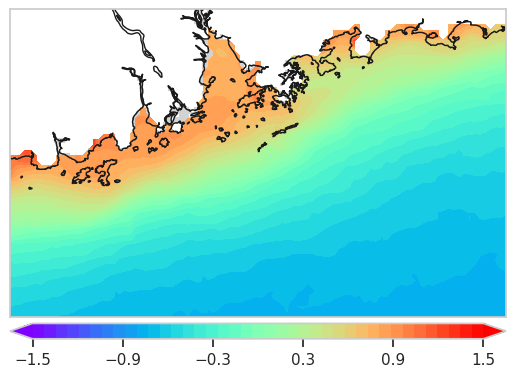

In [19]:
cm = Colormap('chrisluts:i_green').to_mpl()
is_sea = np.load("../data/PRE/is_sea.npy")

mean = np.nanmean(np.load("../data/PRE/chla.npy").squeeze(),0)
mean = np.log10(mean)
mean[~is_sea.astype(bool)]=np.nan

map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, mean, levels=np.linspace(-1.5, 1.5, 40),cmap="rainbow",extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(-1.5, 1.5, 100), ticks=np.linspace(-1.5, 1.5, 6),location="bottom")

**Fig 3h our mean**

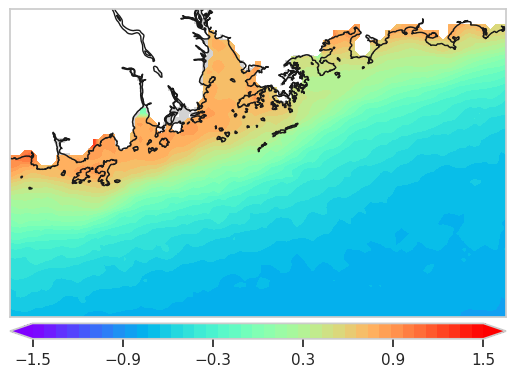

In [20]:
index = [46*i for i in range(306//46)]
predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,num_nodes))
predict = 10**predict
predict = predict.mean(1)
mean = predict.mean(0)
mean = np.log10(mean)
tmp = np.zeros((60, 96))
tmp[is_sea.astype(bool)]=mean
tmp[~is_sea.astype(bool)]=np.nan

map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, tmp, levels=np.linspace(-1.5, 1.5, 40),cmap="rainbow",extend='both')
# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(-1.5, 1.5, 100), ticks=np.linspace(-1.5, 1.5, 6),location="bottom")

**Fig 3g**

torch.Size([329, 10, 46, 4443])


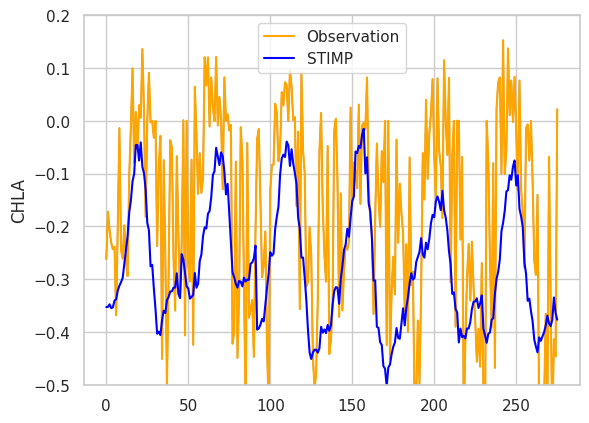

PearsonRResult(statistic=0.5299204943818787, pvalue=2.1959441383800024e-21)
PearsonRResult(statistic=0.5587501300209999, pvalue=4.615514616773349e-24)
0.15792616
0.15338221
0.03699594
0.03496181


In [ ]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import scipy.io as scio

def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]



index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp = tmp.mean(1).numpy()
plt.plot(np.arange(276), np.array(tmp),linewidth=1, color="Gray")
# tmp = runningMeanFast(tmp, 10)

plt.plot(np.arange(276), np.array(tmp), label="Observation",color="Orange")

print(prediction_our.shape)
predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,num_nodes))
predict = predict[:,:].mean(1)
predict = predict.mean(-1)
predict_predrnn_ = deepcopy(prediction_predrnn_wo[index].reshape(276,4443))
predict_predrnn_ = predict_predrnn_.mean(-1)

plt.plot(np.arange(276), predict, label="STIMP", color="Blue")


plt.legend()
plt.ylabel("CHLA")
plt.ylim(-0.5,0.2)
plt.show()
print(stat.pearsonr(tmp[:], predict))
print(stat.pearsonr(tmp[:], predict_predrnn_))
print(np.mean(np.abs(tmp[:]-predict.numpy())))
print(np.mean(np.abs(tmp[:]-predict_predrnn_.numpy())))
print(np.mean((tmp[:]-predict.numpy())**2))
print(np.mean((tmp[:]-predict_predrnn_.numpy())**2))